<a href="https://colab.research.google.com/github/jahidulislam114593/Titanic-Machine-Learning-from-Disaster/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [4]:
titanic_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic - ML from Disaster/train.csv")

In [7]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [63]:
# Count the number of survivors
survived_count = titanic_data['Survived'].sum()
survived_count

342

In [8]:
#Task 2: Identify and handle missing values appropriately.
missing_values = titanic_data.isnull().sum()
print('Missing values in each column: \n', missing_values)

Missing values in each column: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
# Step 1: handle missing 'Age' values: Impute missing 'Age' values with the median
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

# Drop the 'Cabin' column only if it exists
if 'Cabin' in titanic_data.columns:
    titanic_data = titanic_data.drop(columns=['Cabin'])

# Impute missing 'Embarked' values with the mode (most frequent port)
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])


In [13]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
# Step 2: Remove duplicated records
duplicated_rows = titanic_data.duplicated().sum()
print(f'Number of duplicate rows: {duplicated_rows}')
titanic_data = titanic_data.drop_duplicates()

Number of duplicate rows: 0


In [23]:
# Step 3: Create a new column for the passenger's age group
def categorize_age(age):
  if age < 18:
    return "Child"
  elif age < 60:
    return "Adult"
  else:
    return "Senior"

titanic_data['AgeGroup'] = titanic_data['Age'].apply(categorize_age)
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Child


In [29]:
#Task 4: Data Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# 1. Summary of the dataset using descriptive statistics
summary_stats = titanic_data.describe(include='all')
print("Summary of the dataset:\n", summary_stats)

Summary of the dataset:
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       P

In [30]:
# 2. Visualize the distribution of passengers by gender using a bar plot

gender_cnt = titanic_data['Sex'].value_counts();
print(gender_cnt)

Sex
male      577
female    314
Name: count, dtype: int64


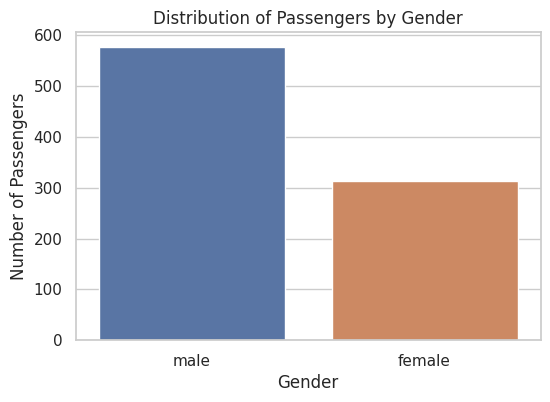

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x=gender_cnt.index, y=gender_cnt.values, hue=gender_cnt.index)
plt.title('Distribution of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()


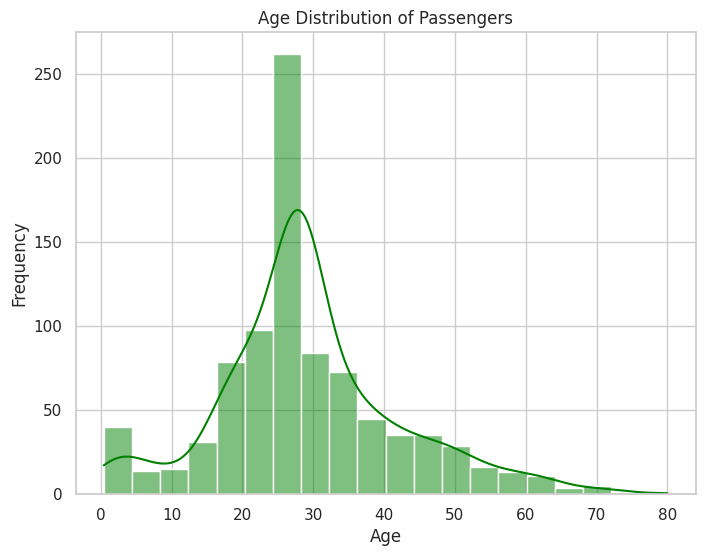

In [39]:
# 3. Create a histogram for the age distribution

plt.figure(figsize=(8,6))
sns.histplot(titanic_data['Age'], bins = 20, kde = True, color="green")
# The KDE (Kernel Density Estimate) line helps us visualize the probability density of ages.
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

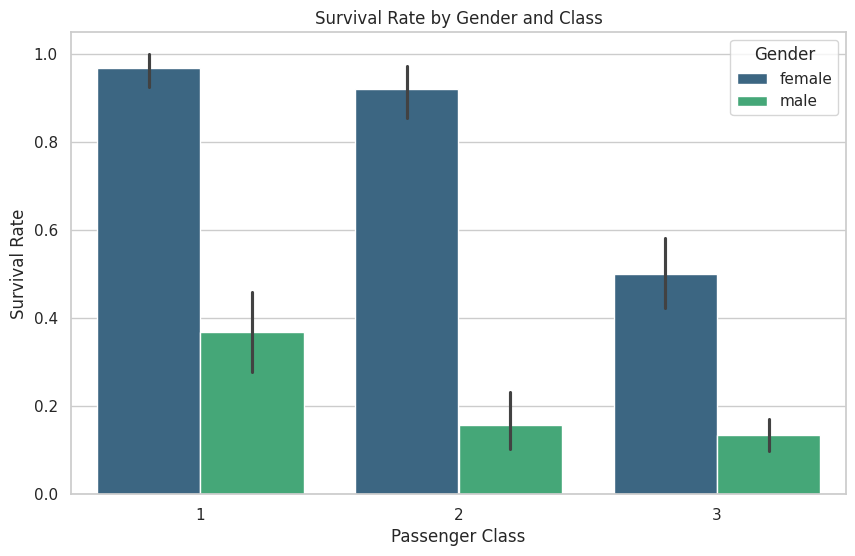

In [50]:
# 4. Visualize the survival rate by gender and class

plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_data, palette='viridis')
plt.title('Survival Rate by Gender and Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.show()

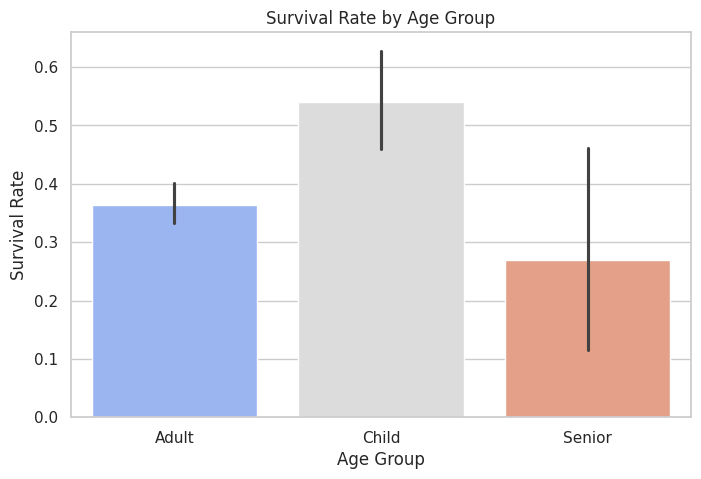

In [46]:
# 5. Additional interesting visualizations: Visualize the survival rate by age group

plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y='Survived', hue='AgeGroup', data=titanic_data, palette='coolwarm', legend=False)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()


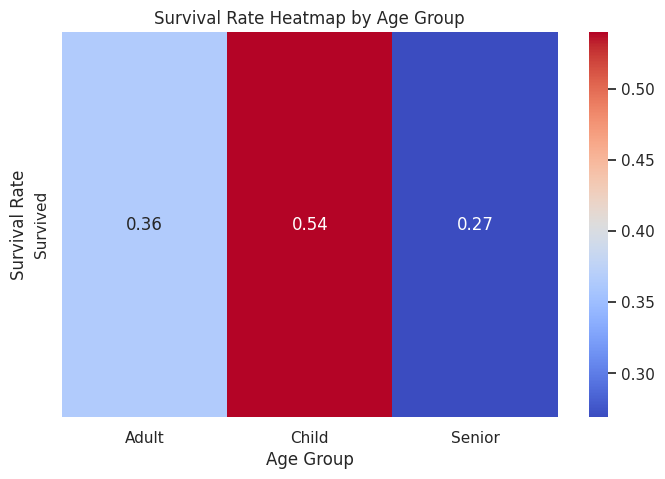

In [52]:
#Additional interesting visualizations

# Calculate survival rate by age group
age_group_survival = titanic_data.groupby('AgeGroup')['Survived'].mean().reset_index()

# Create a format suitable for a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(age_group_survival.set_index('AgeGroup').T, cmap='coolwarm', annot=True, cbar=True)
plt.title('Survival Rate Heatmap by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()


In [59]:
#Task 5: Basic Statistical Analysis

# 1. Calculate mean, median, and mode for the 'Fare' and 'Age' columns

# Mean
fare_mean = titanic_data['Fare'].mean()
age_mean = titanic_data['Age'].mean()

# Median
fare_median = titanic_data['Fare'].median()
age_median = titanic_data['Age'].median()

# Mode
fare_mode = titanic_data['Fare'].mode()[0]
age_mode = titanic_data['Age'].mode()[0]

# Display the results
print(f"Fare - Mean: {fare_mean}, Median: {fare_median}, Mode: {fare_mode}")
print(f"Age - Mean: {age_mean}, Median: {age_median}, Mode: {age_mode}")

Fare - Mean: 32.204207968574636, Median: 14.4542, Mode: 8.05
Age - Mean: 29.36158249158249, Median: 28.0, Mode: 28.0


In [60]:
# 2. Perform a t-test to determine if there's a significant difference in survival rate based on gender
from scipy import stats

# Separate data into two groups based on gender
male_survival = titanic_data[titanic_data['Sex'] == 'male']['Survived']
female_survival = titanic_data[titanic_data['Sex'] == 'female']['Survived']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(male_survival, female_survival, nan_policy='omit')

# Display the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# The t-test helps us determine if the difference in survival rates between men and women is statistically significant.
# - If the p-value is less than 0.05, we can reject the null hypothesis and say the difference in survival rates is significant.

T-statistic: -19.297816550123354, P-value: 1.4060661308802594e-69


In [61]:
# 3. Perform ANOVA to check if passenger class affects fare

# Group fares by class
class_1_fare = titanic_data[titanic_data['Pclass'] == 1]['Fare']
class_2_fare = titanic_data[titanic_data['Pclass'] == 2]['Fare']
class_3_fare = titanic_data[titanic_data['Pclass'] == 3]['Fare']

# Perform a one-way ANOVA test
f_stat, p_value_class = stats.f_oneway(class_1_fare, class_2_fare, class_3_fare)

# Display the results
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value_class}")

# The ANOVA test checks if there's a statistically significant difference in fares among the three passenger classes.
# If the p-value is less than 0.05, we can conclude that class does significantly affect the fare amount.


ANOVA F-statistic: 242.34415651744814, P-value: 1.0313763209141171e-84
